<a href="https://colab.research.google.com/github/MassimoCasolaUnimib/Predicting_Default_Payments/blob/main/Predicting_Default_Payments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
import pandas as pd


In [ ]:
import tensorflow
from keras.models import Sequential
#just import some random layers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_test.csv to X_test (1).csv
Saving X_train.csv to X_train (1).csv
Saving y_train.csv to y_train (1).csv


In [ ]:
import io
X_test = pd.read_csv(io.BytesIO(uploaded['X_test.csv']))
X_train = pd.read_csv(io.BytesIO(uploaded['X_train.csv']))
Y_train = pd.read_csv(io.BytesIO(uploaded['y_train.csv']))

In [ ]:
x_train=X_train.copy()
y_train=Y_train.copy()
x_test=X_test.copy()

In [ ]:
#Delete id column
y_train.drop('ID',axis=1,inplace=True)
x_train.drop('ID',axis=1,inplace=True)

In [ ]:

x_train.shape
x_train.isnull().any()

LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
dtype: bool

In [ ]:
x = x_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_train = pd.DataFrame(x_scaled)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.070707,1.0,0.333333,0.666667,0.051724,0.2,0.2,0.2,0.2,0.2,0.2,0.212996,0.139631,0.129346,0.229591,0.119957,0.212270,0.004010,0.002969,0.002335,0.001961,0.003388,0.001666
1,0.020202,0.0,0.333333,0.666667,0.120690,0.2,0.2,0.2,0.2,0.2,0.2,0.172395,0.094223,0.102352,0.183928,0.102464,0.178567,0.005731,0.000739,0.000950,0.001538,0.000000,0.000000
2,0.171717,1.0,0.833333,0.333333,0.396552,0.2,0.2,0.1,0.1,0.1,0.1,0.165027,0.066220,0.086811,0.160138,0.087471,0.187399,0.000000,0.000505,0.000000,0.011081,0.024242,0.000345
3,0.050505,0.0,0.166667,0.666667,0.068966,0.2,0.2,0.2,0.2,0.2,0.2,0.198585,0.116742,0.107501,0.197477,0.119933,0.212000,0.002310,0.001128,0.002232,0.002415,0.004455,0.003794
4,0.121212,1.0,0.333333,0.666667,0.068966,0.2,0.2,0.2,0.2,0.2,0.2,0.245261,0.172842,0.149338,0.271125,0.200483,0.284403,0.004693,0.002494,0.005580,0.008052,0.011723,0.020298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.040404,0.0,0.333333,0.666667,0.189655,0.2,0.2,0.2,0.2,0.2,0.2,0.192953,0.117088,0.116948,0.212849,0.109640,0.183794,0.002290,0.001781,0.001776,0.000116,0.002659,0.139281
23996,0.191919,0.0,0.166667,0.666667,0.275862,0.4,0.4,0.4,0.4,0.4,0.4,0.285562,0.224319,0.178796,0.314795,0.248252,0.325557,0.015454,0.003562,0.000000,0.012077,0.014067,0.007588
23997,0.040404,0.0,0.166667,0.666667,0.086207,0.0,0.0,0.0,0.0,0.0,0.0,0.146519,0.066220,0.086345,0.160138,0.080648,0.178567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23998,0.060606,1.0,0.333333,0.666667,0.068966,0.2,0.2,0.2,0.2,0.4,0.4,0.211947,0.133116,0.114429,0.193222,0.109040,0.202517,0.003434,0.001187,0.005022,0.001932,0.000000,0.002276


In [ ]:
# For a single-input model with 2 classes (binary classification):

# init model
model = Sequential()

# FC @ 64, non-linear
model.add(Dense(64,activation='relu',input_shape=(x_train.shape[1],)))

# FC @ 32, non linear
model.add(Dense(32, activation='relu'))

# FC @ 16, non linear
model.add(Dense(16,activation='relu'))

# output layer (nb_classes) -- what is the activation function in this case??
model.add(Dense(1, activation='sigmoid'))



# compile: optimizer & losses/metrics
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 64)                1536      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 17        
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train!
# 500 epochs, gradient batched each 16 samples
n_epochs = 500 # MAY BE TOO MANY? 
batch_size = 8 #play with this number in powers of 2 (2^n n=0,1,2,..)

#notice the validation_split keyword, as an alternative to validation_data = (X_val,y_val) https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split = 0.3)  

Epoch 1/500
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4808 - accuracy: 0.7958 - val_loss: 0.4620 - val_accuracy: 0.8110
Epoch 2/500
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4551 - accuracy: 0.8129 - val_loss: 0.4550 - val_accuracy: 0.8158
Epoch 3/500
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4507 - accuracy: 0.8148 - val_loss: 0.4505 - val_accuracy: 0.8203
Epoch 4/500
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4483 - accuracy: 0.8179 - val_loss: 0.4542 - val_accuracy: 0.8168
Epoch 5/500
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4475 - accuracy: 0.8192 - val_loss: 0.4503 - val_accuracy: 0.8161
Epoch 6/500
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8180 - val_loss: 0.4531 - val_accuracy: 0.8197
Epoch 7/500
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8203 - val_loss: 0.4487 - val_ac

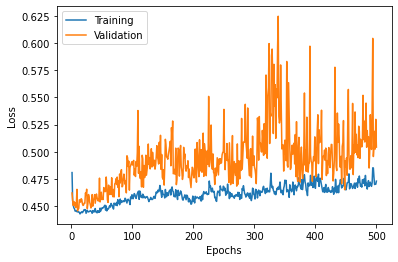

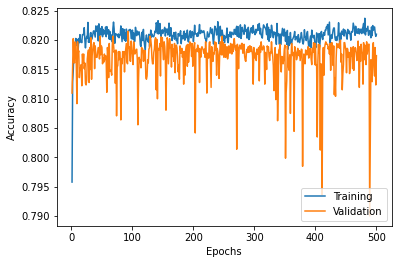

In [ ]:
#plot training history

from matplotlib import pyplot as plt
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(history)

In [ ]:
model.evaluate(x_train,y_train)

In [ ]:

x_test.drop('ID',axis=1,inplace=True)


In [ ]:
x = x_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_test = pd.DataFrame(x_scaled)

In [ ]:

x_test.shape
x_test.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

In [ ]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.025316,0.0,0.333333,0.666667,0.078431,0.2,0.222222,0.2,0.222222,0.222222,0.222222,0.034834,0.034455,0.033339,0.030358,0.136382,0.408722,0.004967,0.005195,0.004357,0.004532,0.004942,0.003783
1,0.177215,1.0,0.166667,0.666667,0.098039,0.2,0.222222,0.2,0.222222,0.222222,0.222222,0.226418,0.203171,0.182410,0.154657,0.252670,0.480722,0.014854,0.011000,0.009182,0.007997,0.008794,0.005049
2,0.075949,1.0,0.500000,0.333333,0.215686,0.2,0.222222,0.2,0.222222,0.222222,0.222222,0.126614,0.120599,0.114112,0.110206,0.238812,0.472590,0.008050,0.008083,0.008714,0.007366,0.008237,0.004831
3,0.151899,0.0,0.500000,0.666667,0.549020,0.2,0.222222,0.2,0.222222,0.222222,0.111111,0.052534,0.047436,0.039851,0.036389,0.131877,0.399630,0.005331,0.004696,0.020374,0.000082,0.023100,0.008338
4,0.050633,1.0,0.333333,0.666667,0.294118,0.2,0.222222,0.2,0.222222,0.222222,0.444444,0.162730,0.089297,0.076995,0.040126,0.148331,0.414039,0.006623,0.003896,0.002905,0.005438,0.000000,0.001892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.443038,1.0,0.166667,0.666667,0.117647,0.3,0.000000,0.1,0.111111,0.111111,0.111111,0.021554,0.019768,0.018091,0.012789,0.113778,0.391829,0.000000,0.002156,0.000000,0.003840,0.000590,0.003726
5996,0.620253,1.0,0.166667,0.666667,0.137255,0.4,0.222222,0.2,0.444444,0.222222,0.222222,0.169192,0.168726,0.175326,0.121822,0.253823,0.484929,0.019868,0.034160,0.000000,0.009064,0.016474,0.018916
5997,0.063291,1.0,0.166667,0.333333,0.137255,0.2,0.222222,0.2,0.222222,0.222222,0.444444,0.090822,0.088754,0.085980,0.083157,0.205998,0.452350,0.006954,0.006494,0.007262,0.007553,0.005272,0.002837
5998,0.012658,1.0,0.166667,0.666667,0.156863,0.3,0.111111,0.1,0.111111,0.111111,0.111111,0.021554,0.023408,0.022540,0.014694,0.112559,0.391623,0.008258,0.010304,0.003980,0.001813,0.000000,0.000000


In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('predictions shape:', predictions.shape)
predictions[:3]

predictions shape: (6000, 1)


array([[0.18614584],
       [0.0704793 ],
       [0.10841647]], dtype=float32)

In [ ]:
y_test = (predictions > 0.5).astype(np.int8) #just FYI an alternative is np.round()
print(np.equal(y_test, np.round(predictions)).all())
y_test.round(decimals=3, out=y_test)


True


(2, 658)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)

750/750 [==============================] - 1s 1ms/step - loss: 0.1818 - accuracy: 1.0000
